In [ ]:
!pip install biopython

In [ ]:
#Bibliotecas
import matplotlib.pyplot as plt
import Bio
from Bio import SeqIO
from Bio.SeqUtils import GC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio import pairwise2
from Bio.SeqUtils import MeltingTemp

In [ ]:
'''
Aline Nataly Lima de Moura - 164905
Guilherme Araújo Mendes de Souza - 156437
Renata Moura Barreto - 163983

UNIFESP - ICT
Algoritmos em Bioinformatica

Projeto Final - Trabalho sobre biopython -genbank
'''

'\nAline Nataly Lima de Moura - 164905\nGuilherme Araújo Mendes de Souza - 156437\nRenata Moura Barreto - 163983\n\nUNIFESP - ICT\nAlgoritmos em Bioinformatica\n\nProjeto Final - Trabalho sobre biopython -genbank\n'

In [ ]:
#Função para imprimir o grafico de frequencia de nucleotídeos
def grafico_freq(variaveis, valores):
    fig, ax = plt.subplots()
    x_pos = range(len(variaveis))

    ax.bar(x_pos, valores, align='center', alpha=0.5)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(variaveis)
    ax.set_ylabel('Valores')

    plt.show()

In [ ]:
#Função que calcula o melting
def calcula_melting(sequencia):
    # Cálculo do conteúdo de GC
    conteudo_gc = GC(sequencia)

    # Cálculo da temperatura de melting (Tm)
    tm = MeltingTemp.Tm_NN(sequencia)

    # Imprime o Conteúdo de GC e a Temperatura de melting
    print("Conteúdo de GC:", conteudo_gc)
    print("Temperatura de melting (Tm):", tm)


In [ ]:
def plot_grafico_barras(dicionario):
    chaves = list(dicionario.keys())
    valores = list(dicionario.values())

    # Configuração do gráfico de barras
    plt.bar(range(len(valores)), valores, align='center')
    plt.xticks(range(len(chaves)), chaves)
    plt.xlabel('Chaves')
    plt.ylabel('Valores')
    plt.title('Frequencia de aminoácidos')

    # Exibição do gráfico
    plt.show()

In [ ]:
#Estrutura_secundaria
def estrutura_secundaria(sequencias):
    for sequencia in sequencias:
        seq_amino = sequencia
        protein_analysis = ProteinAnalysis(str(seq_amino))
        estrutura_secundaria = protein_analysis.secondary_structure_fraction()
        print("Sequência:", seq_amino)
        print("Estrutura Secundária:", estrutura_secundaria)

In [ ]:
#Solicita o nome dos arquivos - OBS: Como com a extenção
arq_gbk = input('Informe o nome do arquivo GenBank: ')
arq_fasta = input('Informe o nome do arquivo fasta: ')
arq_fasta2 = input('Informe o nome do arquivo fasta para o alinhamento global 2 a 2: ')

Informe o nome do arquivo GenBank: /sequence1.gbk
Informe o nome do arquivo fasta: /sequence1.fasta
Informe o nome do arquivo fasta para o alinhamento global 2 a 2: /sequence5.fasta


In [ ]:
#Realiza a leitura do arquivo gbk e imprime a descrição e origem
dados = open(arq_gbk, 'r')
for i in SeqIO.parse(dados, 'genbank'):
    descricao = i.description

    print("Descrição:", descricao)

#Realiza a leitura do arquivo Fasta
seqs = list(SeqIO.parse(arq_fasta, 'fasta'))

Descrição: Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


In [ ]:
refs = list(SeqIO.parse(arq_fasta2, 'fasta'))

A sequencia MN908947.3 tem tamanho 29903


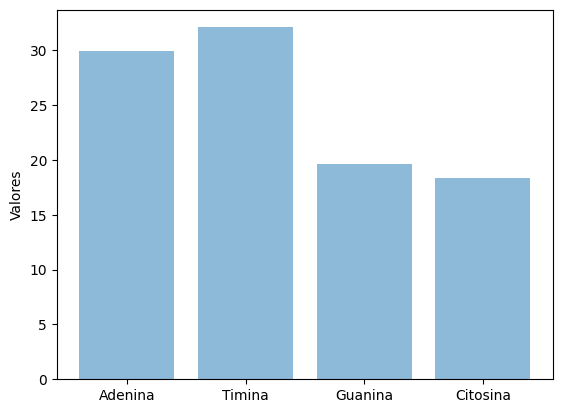

In [ ]:
#Imprime o ID da sequencia e o seu tamanho, além de contar quantas vezes um determinado elemento aparece na sequencia
for i in seqs:
    print(f'A sequencia {i.id} tem tamanho {len(i)}')
    adenina = i.seq.count('A')
    timina = i.seq.count('T')
    guanina = i.seq.count('G')
    citosina = i.seq.count('C')
    tamanho = len(i)

freq_A = (adenina/tamanho)*100
freq_T = (timina/tamanho)*100
freq_G = (guanina/tamanho)*100
freq_C = (citosina/tamanho)*100

variaveis = ['Adenina', 'Timina', 'Guanina', 'Citosina']
valores = [freq_A, freq_T, freq_G, freq_C]

grafico_freq(variaveis, valores)

In [ ]:
#Cria uma Lista vazia para realiza a tradução
traduçao = []

for i in seqs:
    calcula_melting(i.seq)
    traduçao.append(i.seq.translate())
    sequencia = i.seq[:1200]

Conteúdo de GC: 37.97277865097148
Temperatura de melting (Tm): 77.76492619134928


In [ ]:
for i in refs:
  referencia = i.seq[:1200]

In [ ]:
# Realiza o alinhamento global
alinhamentos = pairwise2.align.globalxx(referencia, sequencia)

# Imprime e anota o score máximo e a similaridade de cada alinhamento
for alinhamento in alinhamentos:
    score = alinhamento.score
    similaridade = score / len(referencia)  # Similaridade é o score dividido pelo comprimento da sequência de referência
print(f"Score máximo: {score}")
print(f"Similaridade com a sequência NC_019843.3: {similaridade}")

Score máximo: 793.0
Similaridade com a sequência NC_019843.3: 0.6608333333333334


[Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')]
Numero total de proteínas é: 9967


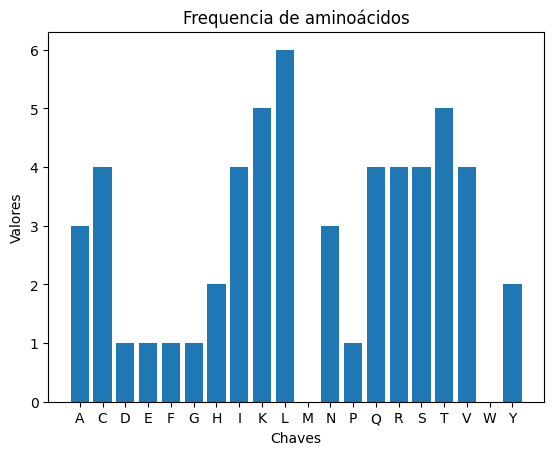

In [ ]:
print(traduçao)
for i in traduçao:
  print(f'Numero total de proteínas é: {len(i)}')
analise_proteina1 = ProteinAnalysis(str(traduçao))
frequencias_proteina1 = analise_proteina1.count_amino_acids()

plot_grafico_barras(frequencias_proteina1)


In [ ]:
resultados = []
for sequencia in traduçao:
    # Cria um objeto ProteinAnalysis
    analise_proteina = ProteinAnalysis(sequencia)

    # Determina a estrutura secundária
    estrutura_secundaria = analise_proteina.secondary_structure_fraction()

    # Armazena os resultados em um dicionário
    resultado = {"Sequência": sequencia, "Estrutura Secundária": estrutura_secundaria}
    resultados.append(resultado)

# Imprime os resultados
for resultado in resultados:
    sequencia = resultado["Sequência"]
    estrutura_secundaria = resultado["Estrutura Secundária"]

    print(f"Sequência Completa: {sequencia}")
    print("Estrutura Secundária:")
    print(f"Hélice Alfa: {estrutura_secundaria[0] * 100}%")
    print(f"Folha Beta: {estrutura_secundaria[1] * 100}%")
    print(f"Coil/Loop: {estrutura_secundaria[2] * 100}%")

Sequência Completa: IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYT